In [1]:
# Surabhi S Nath
# 2016271

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline
from brian2 import *
import brian2
from IPython.display import Image
from scipy.optimize import *

# Fig 5.4: I_Na,p + I_K Model

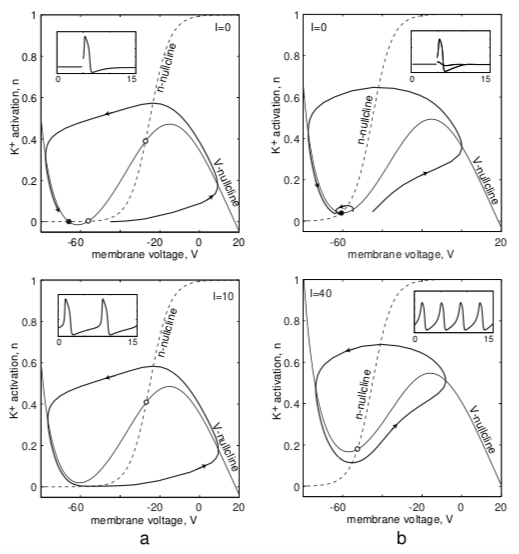

In [3]:
Image(filename="img/1.png")

In [4]:
C = 1

g_L = 8
g_Na = 20
g_K = 10

E_L1 = -80
E_L2 = -78
E_Na = 60
E_K = -90

tau = 1
k_m = 15
k_n = 5

V_half_m_inf = -20
V_half_n_inf1 = -25
V_half_n_inf2 = -45

In [5]:
eqs = '''
dV/dt = (I - g_L*(V - E_L1) - g_Na*m_inf*(V - E_Na) - g_K*n*(V - E_K))/C : 1
dn/dt = (n_inf - n)/tau : 1
m_inf = 1/(1 + exp((V_half_m_inf - V)/k_m)) : 1
n_inf = 1/(1 + exp((V_half_n_inf1 - V)/k_n)) : 1
I : 1
'''

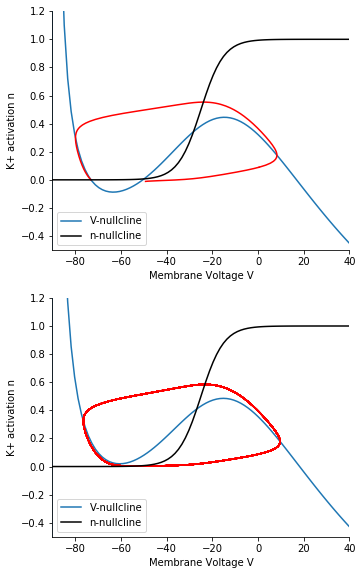

In [6]:
neuron = NeuronGroup(2, eqs, method='exponential_euler')
neuron.I = [-20, 10]
neuron.V = E_L1
neuron.n = 'n_inf'
mon = StateMonitor(neuron, ['V', 'n'], record=True)

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'right': 0.95, 'bottom': 0.15}, figsize=(5, 10))

# dV/dt nullclines
V = linspace(-100, 50, 100)
for line_no, (idx, color) in enumerate([(0, 'C0'), (1, 'C1')]):
    v_null = (neuron.I[idx] - g_L*(V - E_L1) - g_Na*1/(1 + exp((V_half_m_inf - V)/k_m))*(V - E_Na))/(g_K*(V - E_K))
    if idx == 0:
        ax1.plot(V, v_null, label='V-nullcline')
    elif idx == 1:
        ax2.plot(V, v_null, label='V-nullcline')

# dn/dt nullcline
n_null = 1/(1 + exp((V_half_n_inf1 - V)/k_n))

def dz_dt(z, t, kk):
    m_inf = 1/(1 + exp((V_half_m_inf - z[0])/k_m))
    n_inf = 1/(1 + exp((V_half_n_inf1 - z[0])/k_n))
        
    dx_dt = (neuron.I[kk] - g_L*(z[0] - E_L1) - g_Na*m_inf*(z[0] - E_Na) - g_K*z[1]*(z[0] - E_K))/C 
    dy_dt = (n_inf - z[1])/tau
    
    return [dx_dt, dy_dt]

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 70, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')
xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, -90.5, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 70, 10000), args=(1,))
ax2.plot(xs[:, 0], xs[:,1], 'r-')

ax1.plot(V, n_null, color='k', label='n-nullcline')
ax1.set(xlim=(-90, 40), ylim=(-0.5, 1.2), xlabel='Membrane Voltage V')
ax1.set_ylabel('K+ activation n', rotation=90)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()

ax2.plot(V, n_null, color='k', label='n-nullcline')
ax2.set(xlim=(-90, 40), ylim=(-0.5, 1.2), xlabel='Membrane Voltage V')
ax2.set_ylabel('K+ activation n', rotation=90)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.legend()
plt.show()

In [7]:
eqs = '''
dV/dt = (I - g_L*(V - E_L2) - g_Na*m_inf*(V - E_Na) - g_K*n*(V - E_K))/C : 1
dn/dt = (n_inf - n)/tau : 1
m_inf = 1/(1 + exp((V_half_m_inf - V)/k_m)) : 1
n_inf = 1/(1 + exp((V_half_n_inf2 - V)/k_n)) : 1
I : 1
'''

WARNING    "V" is an internal variable of group "neurongroup_1", but also exists in the run namespace with the value array([-100.        ,  -98.48484848,  -96.96969697, ...,   46.96969697,
         48.48484848,   50.        ]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


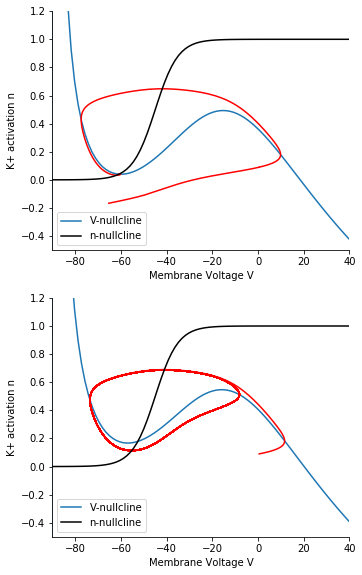

In [8]:
neuron = NeuronGroup(2, eqs, method='exponential_euler')
neuron.I = [0, 40]
neuron.V = E_L2
neuron.n = 'n_inf'
mon = StateMonitor(neuron, ['V', 'n'], record=True)

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'right': 0.95, 'bottom': 0.15}, figsize=(5, 10))

# dV/dt nullclines
V = linspace(-100, 50, 100)
for line_no, (idx, color) in enumerate([(0, 'C0'), (1, 'C1')]):
    v_null = (neuron.I[idx] - g_L*(V - E_L2) - g_Na*1/(1 + exp((V_half_m_inf - V)/k_m))*(V - E_Na))/(g_K*(V - E_K))
    if idx == 0:
        ax1.plot(V, v_null, label='V-nullcline')
    elif idx == 1:
        ax2.plot(V, v_null, label='V-nullcline')

# dn/dt nullcline
n_null = 1/(1 + exp((V_half_n_inf2 - V)/k_n))

def dz_dt(z, t, kk):
    m_inf = 1/(1 + exp((V_half_m_inf - z[0])/k_m))
    n_inf = 1/(1 + exp((V_half_n_inf2 - z[0])/k_n))
        
    dx_dt = (neuron.I[kk] - g_L*(z[0] - E_L2) - g_Na*m_inf*(z[0] - E_Na) - g_K*z[1]*(z[0] - E_K))/C 
    dy_dt = (n_inf - z[1])/tau
    
    return [dx_dt, dy_dt]

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 70, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')
xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, -90.5, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 0, 10000), args=(1,))
ax2.plot(xs[:, 0], xs[:,1], 'r-')

ax1.plot(V, n_null, color='k', label="n-nullcline")
ax1.set(xlim=(-90, 40), ylim=(-0.5, 1.2), xlabel='Membrane Voltage V')
ax1.set_ylabel('K+ activation n', rotation=90)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()

ax2.plot(V, n_null, color='k', label="n-nullcline")
ax2.set(xlim=(-90, 40), ylim=(-0.5, 1.2), xlabel='Membrane Voltage V')
ax2.set_ylabel('K+ activation n', rotation=90)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.legend()
plt.show()

# Fig 5.4: I_Na,t Model

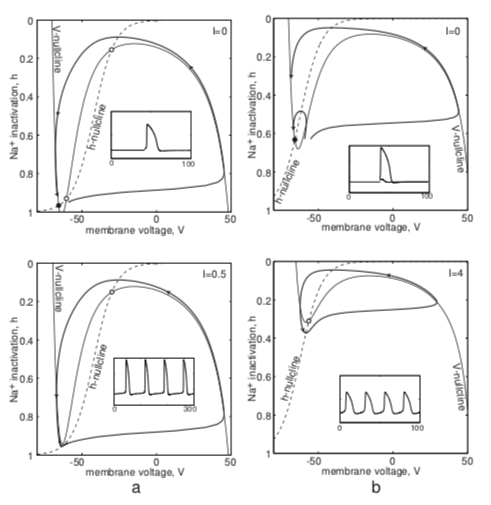

In [9]:
Image(filename="img/2.png")

In [10]:
C = 1

g_L1 = 0.3
g_Na1 = 10
g_L2 = 1
g_Na2 = 15
g_K = 36

E_L1 = 10.6
E_Na1 = 120
E_L2 = -70
E_Na2 = 60
E_K = -12

tau = 5

V_half_m_inf = -40
k_m = 15
V_half_h_inf1 = -42
V_half_h_inf2 = -62
k_h = -7

In [11]:
eqs = '''
dV/dt = (I - g_L1*(V - E_L1) - g_Na1*m_inf*m_inf*m_inf*h*(V - E_Na1))/C : 1
dh/dt = (h_inf - h)/tau : 1
m_inf = 1/(1 + exp((V_half_m_inf - V)/k_m)) : 1
h_inf = 1/(1 + exp((V_half_h_inf1 - V)/k_h)) : 1
I : 1
'''

WARNING    "V" is an internal variable of group "neurongroup", but also exists in the run namespace with the value array([-100.        ,  -98.48484848,  -96.96969697, ...,   46.96969697,
         48.48484848,   50.        ]). The internal variable will be used. [brian2.groups.group.Group.resolve.resolution_conflict]


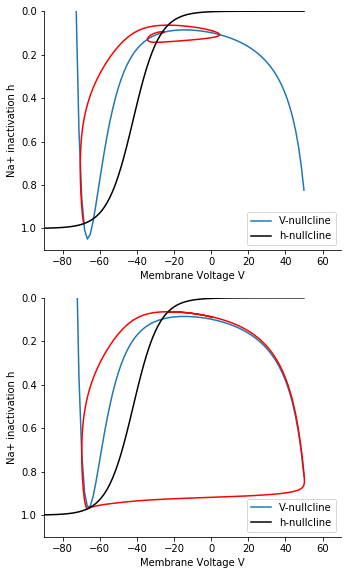

In [12]:
neuron = NeuronGroup(2, eqs, method='exponential_euler')
neuron.I = [-2.69, -2.19]
neuron.V = E_L2
neuron.h = 'h_inf'
mon = StateMonitor(neuron, ['V', 'h'], record=True)

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'right': 0.95, 'bottom': 0.15}, figsize=(5, 10))

# dV/dt nullclines
V = linspace(-100, 50, 100)
for line_no, (idx, color) in enumerate([(0, 'C0'), (1, 'C1')]):
    v_null = (neuron.I[idx] - g_L2*(V - E_L2))/(g_Na2 * (1/(1 + exp((V_half_m_inf - V)/k_m)))**3 * (V - E_Na2))
    if idx == 0:
        ax1.plot(V, v_null, label="V-nullcline")
    elif idx == 1:
        ax2.plot(V, v_null, label="V-nullcline")

# dh/dt nullcline
h_null = 1/(1 + exp((V_half_h_inf1 - V)/k_h))

def dz_dt(z, t, kk):
    m_inf = 1/(1 + exp((V_half_m_inf - z[0])/k_m))
    h_inf = 1/(1 + exp((V_half_h_inf1 - z[0])/k_h))
    dx_dt = (neuron.I[kk] - g_L2 * (z[0] - E_L2) - g_Na2 * m_inf * m_inf * m_inf * z[1] *(z[0] - E_Na2))/C
    dy_dt = (h_inf - z[1])/tau
    
    return [dx_dt, dy_dt]

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 70, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')
xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, -100, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 70, 10000), args=(1,))
ax2.plot(xs[:, 0], xs[:,1], 'r-')

ax1.plot(V, h_null, color='k', label="h-nullcline")
ax1.set(xlim=(-90, 70), ylim=(1.1, 0), xlabel='Membrane Voltage V')
ax1.set_ylabel('Na+ inactivation h', rotation=90)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()

ax2.plot(V, h_null, color='k', label="h-nullcline")
ax2.set(xlim=(-90, 70), ylim=(1.1, 0), xlabel='Membrane Voltage V')
ax2.set_ylabel('Na+ inactivation h', rotation=90)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.legend()
plt.show()

In [13]:
eqs = '''
dV/dt = (I - g_L2*(V - E_L2) - g_Na2*m_inf*m_inf*m_inf*h*(V - E_Na2))/C : 1
dh/dt = (h_inf - h)/tau : 1
m_inf = 1/(1 + exp((V_half_m_inf - V)/k_m)) : 1
h_inf = 1/(1 + exp((V_half_h_inf2 - V)/k_h)) : 1
I : 1
'''

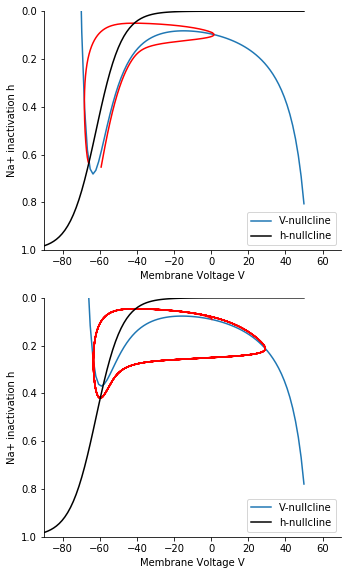

In [14]:
neuron = NeuronGroup(2, eqs, method='exponential_euler')
neuron.I = [0, 4]
neuron.V = E_L2
neuron.h = 'h_inf'
mon = StateMonitor(neuron, ['V', 'h'], record=True)

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'right': 0.95, 'bottom': 0.15}, figsize=(5, 10))

# dV/dt nullclines
V = linspace(-100, 50, 100)
for line_no, (idx, color) in enumerate([(0, 'C0'), (1, 'C1')]):
    v_null = (neuron.I[idx] - g_L2*(V - E_L2))/(g_Na2 * (1/(1 + exp((V_half_m_inf - V)/k_m)))**3 * (V - E_Na2))
    if idx == 0:
        ax1.plot(V, v_null, label="V-nullcline")
    elif idx == 1:
        ax2.plot(V, v_null, label="V-nullcline")

# dh/dt nullcline
h_null = 1/(1 + exp((V_half_h_inf2 - V)/k_h))

def dz_dt(z, t, kk):
    m_inf = 1/(1 + exp((V_half_m_inf - z[0])/k_m))
    h_inf = 1/(1 + exp((V_half_h_inf2 - z[0])/k_h))
    dx_dt = (neuron.I[kk] - g_L2 * (z[0] - E_L2) - g_Na2 * m_inf * m_inf * m_inf * z[1] *(z[0] - E_Na2))/C
    dy_dt = (h_inf - z[1])/tau
    
    return [dx_dt, dy_dt]

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 70, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')
xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, -106, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 70, 10000), args=(1,))
ax2.plot(xs[:, 0], xs[:,1], 'r-')

ax1.plot(V, h_null, color='k', label="h-nullcline")
ax1.set(xlim=(-90, 70), ylim=(1, 0), xlabel='Membrane Voltage V')
ax1.set_ylabel('Na+ inactivation h', rotation=90)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()

ax2.plot(V, h_null, color='k', label="h-nullcline")
ax2.set(xlim=(-90, 70), ylim=(1, 0), xlabel='Membrane Voltage V')
ax2.set_ylabel('Na+ inactivation h', rotation=90)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.legend()

plt.show()

# Fig 5.12: I_K + I_Kir Model

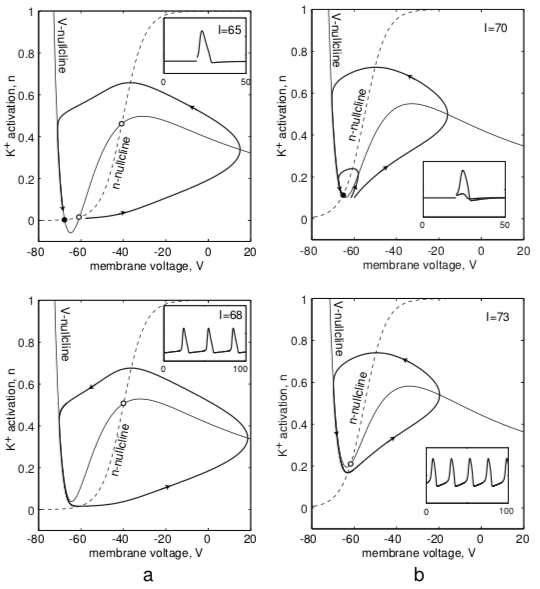

In [15]:
Image(filename="img/4.png")

In [16]:
C = 1

g_K = 2
g_Kir = 20

E_K = -80

tau = 5

V_half_h_inf = -80
k_h = -12
V_half_n_inf1 = -40
V_half_n_inf2 = -55
k_n = 5

In [17]:
eqs = '''
dV/dt = (I - g_Kir * h_inf * (V - E_K) - g_K * n * (V - E_K))/C : 1
dn/dt = (n_inf - n)/tau : 1
h_inf = 1/(1 + exp((V_half_h_inf - V)/k_h)) : 1
n_inf = 1/(1 + exp((V_half_n_inf1 - V)/k_n)) : 1
I : 1
'''

WARNING    /Users/mac/opt/anaconda3/lib/python3.7/site-packages/brian2/units/fundamentalunits.py:207: RuntimeWarning: overflow encountered in exp
  return func(np.array(x, copy=False), *args, **kwds)
 [py.warnings]


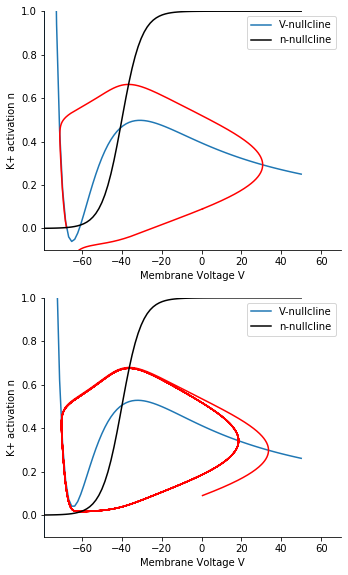

In [18]:
neuron = NeuronGroup(2, eqs, method='exponential_euler')
neuron.I = [65, 68]
neuron.V = E_K
neuron.n = 'n_inf'
mon = StateMonitor(neuron, ['V', 'n'], record=True)

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'right': 0.95, 'bottom': 0.15}, figsize=(5, 10))

# dV/dt nullclines
V = linspace(-100, 50, 100)
for line_no, (idx, color) in enumerate([(0, 'C0'), (1, 'C1')]):
    v_null = neuron.I[idx]/(g_K * (V - E_K)) - g_Kir * (1/(1 + exp((V_half_h_inf - V)/k_h))) / g_K
    if idx == 0:
        ax1.plot(V, v_null, label="V-nullcline")
    elif idx == 1:
        ax2.plot(V, v_null, label="V-nullcline")

# dn/dt nullcline
n_null = 1/(1 + exp((V_half_n_inf1 - V)/k_n))

def dz_dt(z, t, kk):
    h_inf = 1/(1 + exp((V_half_h_inf - z[0])/k_h))
    n_inf = 1/(1 + exp((V_half_n_inf1 - z[0])/k_n))
    dx_dt = (neuron.I[kk] - g_Kir * h_inf * (z[0] - E_K) - g_K * z[1] * (z[0] - E_K))/C
    dy_dt = (n_inf - z[1])/tau
    
    return [dx_dt, dy_dt]

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 70, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')
xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, -100, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 100, 10000), args=(1,))
ax2.plot(xs[:, 0], xs[:,1], 'r-')
# xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, -100, 10000), args=(1,))
# ax2.plot(xs[:, 0], xs[:,1], 'r-')

ax1.plot(V, n_null, color='k', label="n-nullcline")
ax1.set(xlim=(-79, 70), ylim=(-0.1, 1), xlabel='Membrane Voltage V')
ax1.set_ylabel('K+ activation n', rotation=90)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()

ax2.plot(V, n_null, color='k', label="n-nullcline")
ax2.set(xlim=(-79, 70), ylim=(-0.1, 1), xlabel='Membrane Voltage V')
ax2.set_ylabel('K+ activation n', rotation=90)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.legend()

plt.show()

In [19]:
eqs = '''
dV/dt = (I - g_Kir * h_inf * (V - E_K) - g_K * n * (V - E_K))/C : 1
dn/dt = (n_inf - n)/tau : 1
h_inf = 1/(1 + exp((V_half_h_inf - V)/k_h)) : 1
n_inf = 1/(1 + exp((V_half_n_inf2 - V)/k_n)) : 1
I : 1
'''

WARNING    /Users/mac/opt/anaconda3/lib/python3.7/site-packages/brian2/units/fundamentalunits.py:207: RuntimeWarning: overflow encountered in exp
  return func(np.array(x, copy=False), *args, **kwds)
 [py.warnings]


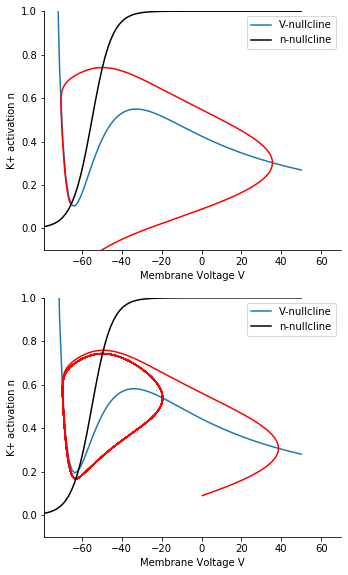

In [20]:
neuron = NeuronGroup(2, eqs, method='exponential_euler')
neuron.I = [70, 73]
neuron.V = E_K
neuron.n = 'n_inf'
mon = StateMonitor(neuron, ['V', 'n'], record=True)

fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'right': 0.95, 'bottom': 0.15}, figsize=(5, 10))

# dV/dt nullclines
V = linspace(-100, 50, 100)
for line_no, (idx, color) in enumerate([(0, 'C0'), (1, 'C1')]):
    v_null = neuron.I[idx]/(g_K * (V - E_K)) - g_Kir * (1/(1 + exp((V_half_h_inf - V)/k_h))) / g_K
    if idx == 0:
        ax1.plot(V, v_null, label="V-nullcline")
    elif idx == 1:
        ax2.plot(V, v_null, label="V-nullcline")

# dn/dt nullcline
n_null = 1/(1 + exp((V_half_n_inf2 - V)/k_n))

def dz_dt(z, t, kk):
    h_inf = 1/(1 + exp((V_half_h_inf - z[0])/k_h))
    n_inf = 1/(1 + exp((V_half_n_inf2 - z[0])/k_n))
    dx_dt = (neuron.I[kk] - g_Kir * h_inf * (z[0] - E_K) - g_K * z[1] * (z[0] - E_K))/C
    dy_dt = (n_inf - z[1])/tau
    
    return [dx_dt, dy_dt]

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 70, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')
xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, -100, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 100, 10000), args=(1,))
ax2.plot(xs[:, 0], xs[:,1], 'r-')
# xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, -100, 10000), args=(1,))
# ax2.plot(xs[:, 0], xs[:,1], 'r-')

ax1.plot(V, n_null, color='k', label="n-nullcline")
ax1.set(xlim=(-79, 70), ylim=(-0.1, 1), xlabel='Membrane Voltage V')
ax1.set_ylabel('K+ activation n', rotation=90)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()

ax2.plot(V, n_null, color='k', label="n-nullcline")
ax2.set(xlim=(-79, 70), ylim=(-0.1, 1), xlabel='Membrane Voltage V')
ax2.set_ylabel('K+ activation n', rotation=90)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.legend()

plt.show()

# Fig 5.14: I_A Model

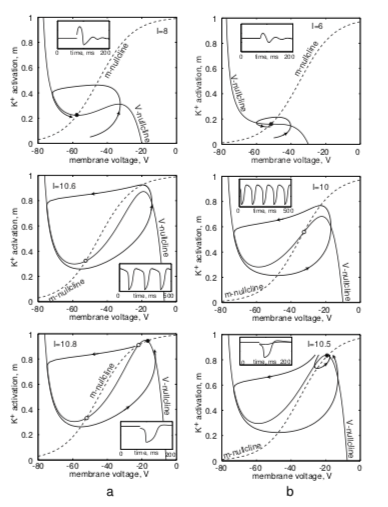

In [21]:
Image(filename="img/3.png")

In [22]:
C = 1

g_A = 5
g_L = 0.2

E_K = -80
E_L = -60

tau = 20

V_half_h_inf = -66
k_h = -10
V_half_m_inf1 = -45
V_half_m_inf2 = -35
k_m = 10

In [23]:
eqs = '''
dV/dt = (I - g_L*(V - E_L) - g_A * m * h_inf *(V - E_K))/C : 1
dm/dt = (m_inf - m)/tau : 1
h_inf = 1/(1 + exp((V_half_h_inf - V)/k_h)) : 1
m_inf = 1/(1 + exp((V_half_m_inf1 - V)/k_m)) : 1
I : 1
'''

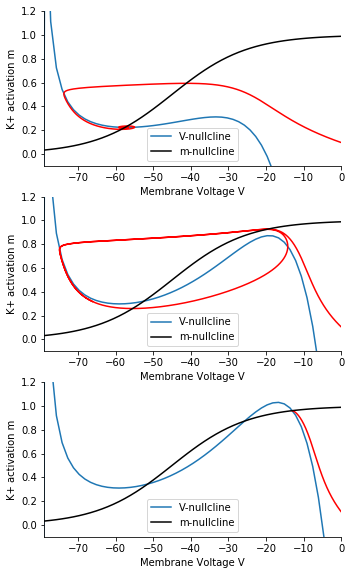

In [24]:
neuron = NeuronGroup(3, eqs, method='exponential_euler')
neuron.I = [8, 10.6, 11]
neuron.V = E_L
neuron.m = 'm_inf'
mon = StateMonitor(neuron, ['V', 'm'], record=True)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'right': 0.95, 'bottom': 0.15}, figsize=(5, 10))

# dV/dt nullclines
V = linspace(-100, 50, 100)
for line_no, (idx, color) in enumerate([(0, 'C0'), (1, 'C1'), (2, 'C2')]):
    v_null = (neuron.I[idx] - g_L*(V - E_L))/(g_A * (1/(1 + exp((V_half_h_inf - V)/k_h))) * (V - E_K))
    if idx == 0:
        ax1.plot(V, v_null, label="V-nullcline")
    elif idx == 1:
        ax2.plot(V, v_null, label="V-nullcline")
    elif idx == 2:
        ax3.plot(V, v_null, label="V-nullcline")

# dm/dt nullcline
m_null = 1/(1 + exp((V_half_m_inf1 - V)/k_m))

def dz_dt(z, t, kk):
    h_inf = 1/(1 + exp((V_half_h_inf - z[0])/k_h))
    m_inf = 1/(1 + exp((V_half_m_inf1 - z[0])/k_m))
        
    dx_dt = (neuron.I[kk] - g_L*(z[0] - E_L) - g_A * z[1] * h_inf *(z[0] - E_K))/C
    dy_dt = (m_inf - z[1])/tau
    
    return [dx_dt, dy_dt]

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 200, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')
xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, -100, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 200, 10000), args=(1,))
ax2.plot(xs[:, 0], xs[:,1], 'r-')
xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, -100, 10000), args=(1,))
ax2.plot(xs[:, 0], xs[:,1], 'r-')

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 200, 10000), args=(2,))
ax3.plot(xs[:, 0], xs[:,1], 'r-')
xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, -100, 10000), args=(2,))
ax3.plot(xs[:, 0], xs[:,1], 'r-')

ax1.plot(V, m_null, color='k', label="m-nullcline")
ax1.set(xlim=(-79, 0), ylim=(-0.1, 1.2), xlabel='Membrane Voltage V')
ax1.set_ylabel('K+ activation m', rotation=90)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()

ax2.plot(V, m_null, color='k', label="m-nullcline")
ax2.set(xlim=(-79, 0), ylim=(-0.1, 1.2), xlabel='Membrane Voltage V')
ax2.set_ylabel('K+ activation m', rotation=90)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.legend()

ax3.plot(V, m_null, color='k', label="m-nullcline")
ax3.set(xlim=(-79, 0), ylim=(-0.1, 1.2), xlabel='Membrane Voltage V')
ax3.set_ylabel('K+ activation m', rotation=90)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.legend()

plt.show()

In [25]:
eqs = '''
dV/dt = (I - g_L*(V - E_L) - g_A * m * h_inf *(V - E_K))/C : 1
dm/dt = (m_inf - m)/tau : 1
h_inf = 1/(1 + exp((V_half_h_inf - V)/k_h)) : 1
m_inf = 1/(1 + exp((V_half_m_inf2 - V)/k_m)) : 1
I : 1
'''

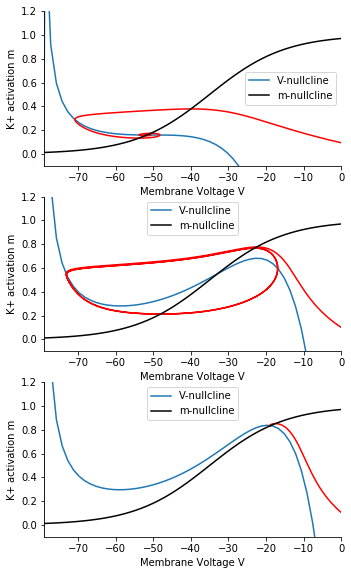

In [26]:
neuron = NeuronGroup(3, eqs, method='exponential_euler')
neuron.I = [6, 10, 10.5]
neuron.V = E_L
neuron.m = 'm_inf'
mon = StateMonitor(neuron, ['V', 'm'], record=True)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'right': 0.95, 'bottom': 0.15}, figsize=(5, 10))

# dV/dt nullclines
V = linspace(-100, 50, 100)
for line_no, (idx, color) in enumerate([(0, 'C0'), (1, 'C1'), (2, 'C2')]):
    v_null = (neuron.I[idx] - g_L*(V - E_L))/(g_A * (1/(1 + exp((V_half_h_inf - V)/k_h))) * (V - E_K))
    if idx == 0:
        ax1.plot(V, v_null, label="V-nullcline")
    elif idx == 1:
        ax2.plot(V, v_null, label="V-nullcline")
    elif idx == 2:
        ax3.plot(V, v_null, label="V-nullcline")

# dm/dt nullcline
m_null = 1/(1 + exp((V_half_m_inf2 - V)/k_m))

def dz_dt(z, t, kk):
    h_inf = 1/(1 + exp((V_half_h_inf - z[0])/k_h))
    m_inf = 1/(1 + exp((V_half_m_inf2 - z[0])/k_m))
        
    dx_dt = (neuron.I[kk] - g_L*(z[0] - E_L) - g_A * z[1] * h_inf *(z[0] - E_K))/C
    dy_dt = (m_inf - z[1])/tau
    
    return [dx_dt, dy_dt]

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 200, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')
xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, -100, 10000), args=(0,))
ax1.plot(xs[:, 0], xs[:,1], 'r-')

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 200, 10000), args=(1,))
ax2.plot(xs[:, 0], xs[:,1], 'r-')
xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, -100, 10000), args=(1,))
ax2.plot(xs[:, 0], xs[:,1], 'r-')

xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, 200, 10000), args=(2,))
ax3.plot(xs[:, 0], xs[:,1], 'r-')
xs = odeint(dz_dt, [0.5, 0.09], np.linspace(-90, -100, 10000), args=(2,))
ax3.plot(xs[:, 0], xs[:,1], 'r-')

ax1.plot(V, m_null, color='k', label="m-nullcline")
ax1.set(xlim=(-79, 0), ylim=(-0.1, 1.2), xlabel='Membrane Voltage V')
ax1.set_ylabel('K+ activation m', rotation=90)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.legend()

ax2.plot(V, m_null, color='k', label="m-nullcline")
ax2.set(xlim=(-79, 0), ylim=(-0.1, 1.2), xlabel='Membrane Voltage V')
ax2.set_ylabel('K+ activation m', rotation=90)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.legend()

ax3.plot(V, m_null, color='k', label="m-nullcline")
ax3.set(xlim=(-79, 0), ylim=(-0.1, 1.2), xlabel='Membrane Voltage V')
ax3.set_ylabel('K+ activation m', rotation=90)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
ax3.legend()

plt.show()

# JACOBIANS, CRITICAL POINTS AND BIFURCATIONS

In [27]:
import sympy as sp
from sympy import symbols, exp, diff, lambdify, Matrix
from scipy.optimize import *
import numpy as np
import matplotlib.pyplot as plt
from numpy import empty, sqrt
# C, I, g_L, g_Na, G_K, E_L, E_Na, E_K, V_half_m_inf, k_m, V_half_n_inf, k_n, V_half_h_inf, k_h, tau, g_A,
# C, I, g_L, g_Na, G_K, E_L, E_Na, E_K, V_half_m_inf, k_m, V_half_n_inf, k_n, V_half_h_inf, k_h, tau, g_A

In [28]:
t, V, m, n, h  = symbols('t, V, m, n, h')

In [29]:
#http://systems-sciences.uni-graz.at/etextbook/sw2/phpl_python.html
def eigenvalues(x,y):
    a11 = aa(x,y) # differentiated with respect to x
    a12 = bb(x,y) # differentiated with respect to y
    a21 = cc(x,y) # differentiated with respect to x
    a22 = dd(x,y) # differentiated with respect to y

    tr = a11 + a22
    det = a11*a22 - a12*a21
    
    if tr**2 >= 4*det:
        # Real
        lambda1 = (tr - sqrt(tr**2 - 4*det))/2
        lambda2 = (tr + sqrt(tr**2 - 4*det))/2

        print('Check the fixed point  %s, %s' % (x,y))
        print('The first eigenvalue is %s' % lambda1)
        print('The second eigenvalue is %s' % lambda2)
    
    else:
        lambda1 = tr/2
        lambda2 = tr/2

        print('Check the fixed point (%s, %s)' % (x,y))
        print('The real component of the first eigenvalue is %s' % lambda1)
        print('The real component of the second eigenvalue is %s' % lambda2)
        
    
    if (lambda1 < 0 and lambda2 < 0):
        print('The fixed point (%s, %s) is a sink. It is stable' % (x,y))
        return 1
    if (lambda1 > 0 and lambda2 > 0):
        print('The fixed point (%s, %s) is a source. It is unstable' % (x,y))
        return 0
    if (lambda1 > 0 and lambda2 < 0):
        print('The fixed point (%s, %s) is a saddle. It is unstable' % (x,y))
        return 0
    if (lambda1 < 0 and lambda2 > 0):
        print('The fixed point (%s, %s) is a saddle. It is unstable' % (x,y))
        return 0

# I_Na,p + I_K model

## Jacobian

In [30]:
C = 1

g_L = 8
g_Na = 20
g_K = 10

E_L1 = -80
E_L2 = -78
E_Na = 60
E_K = -90

tau = 1
k_m = 15
k_n = 5

V_half_m_inf = -20
V_half_n_inf1 = -25
V_half_n_inf2 = -45

I = -20

Vdot = (I - g_L * (V - E_L1) - g_Na * (1/(1 + exp((V_half_m_inf - V)/k_m))) * (V - E_Na) - g_K * n * (V - E_K))/C
ndot = ((1/(1 + exp((V_half_n_inf1 - V)/k_n))) - n)/tau

In [31]:
a = diff(Vdot, V)
aa = lambdify((V,n), a)
b = diff(Vdot, n)
bb = lambdify((V,n), b)
c = diff(ndot, V)
cc = lambdify((V,n), c)
d = diff(ndot, n)
dd = lambdify((V,n), d)

In [32]:
jacobian = Matrix([[a, b], [c, d]])

In [33]:
jacobian

Matrix([
[-10*n - 4*(V - 60)*exp(-V/15 - 4/3)/(3*(exp(-V/15 - 4/3) + 1)**2) - 8 - 20/(exp(-V/15 - 4/3) + 1), -10*V - 900],
[                                                         exp(-V/5 - 5)/(5*(exp(-V/5 - 5) + 1)**2),          -1]])

In [34]:
#jacobian.eigenvals()

## Bifurcation Diagram

I = -20
Number of Critical Points = 3
Critical Point 1 = (-73, 0.0)
Critical Point 2 = (-50, 0.0)
Critical Point 3 = (-28, 0.3)

Check the fixed point  -73, 0.0
The first eigenvalue is -3.677064650573717
The second eigenvalue is -1.000860070803118
The fixed point (-73, 0.0) is a sink. It is stable
Check the fixed point  -50, 0.0
The first eigenvalue is -0.9102408698926827
The second eigenvalue is 4.925241621964618
The fixed point (-50, 0.0) is a saddle. It is unstable
Check the fixed point (-28, 0.3)
The real component of the first eigenvalue is 3.973828989602021
The real component of the second eigenvalue is 3.973828989602021
The fixed point (-28, 0.3) is a source. It is unstable



I = -15
Number of Critical Points = 3
Critical Point 1 = (-72, 0.0)
Critical Point 2 = (-51, 0.0)
Critical Point 3 = (-28, 0.4)

Check the fixed point  -72, 0.0
The first eigenvalue is -3.4370949627660474
The second eigenvalue is -1.0012217717204905
The fixed point (-72, 0.0) is a sink. It is stable
Check 

WARNING    /Users/mac/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
 [py.warnings]
WARNING    /Users/mac/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
 [py.warnings]


Number of Critical Points = 2
Critical Point 1 = (-61, 0.0)
Critical Point 2 = (-27, 0.4)

Check the fixed point  -61, 0.0
The first eigenvalue is -0.9559334947862713
The second eigenvalue is -0.018815044905242106
The fixed point (-61, 0.0) is a sink. It is stable
Check the fixed point (-27, 0.4)
The real component of the first eigenvalue is 3.384294838750393
The real component of the second eigenvalue is 3.384294838750393
The fixed point (-27, 0.4) is a source. It is unstable



I = 10
Number of Critical Points = 2
Critical Point 1 = (-60, 0.0)
Critical Point 2 = (-27, 0.4)

Check the fixed point  -60, 0.0
The first eigenvalue is -0.960447295638862
The second eigenvalue is 0.3807721036887951
The fixed point (-60, 0.0) is a saddle. It is unstable
Check the fixed point (-27, 0.4)
The real component of the first eigenvalue is 3.384294838750393
The real component of the second eigenvalue is 3.384294838750393
The fixed point (-27, 0.4) is a source. It is unstable



I = 15
Number of Critic

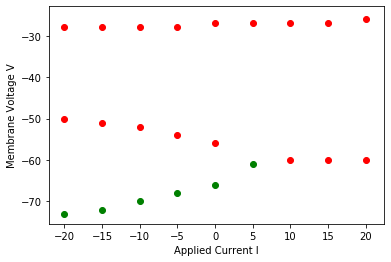

In [35]:
def func(z):
    V = z[0]
    n = z[1]
    F = empty((2))
    F[0] = (i - g_L*(V - E_L1) - g_Na*1/(1 + exp((V_half_m_inf - V)/k_m))*(V - E_Na))/(g_K*(V - E_K)) - n
    F[1] = 1/(1 + exp((V_half_n_inf1 - V)/k_n)) - n
    return F

I = [-20, -15, -10, -5, 0, 5, 10, 15, 20]
for i in I:
    print("I =", i)
    d = {}
    for init in [-80, -70, -60, -50, -40, -30, -20]:
        criticalpoints = fsolve(func, [init, 0.5])
        x = int(np.round(criticalpoints[0]))
        y = np.round(criticalpoints[1], 1)
        if (x, y) not in d:
            d[(x, y)] = 0
    
    print("Number of Critical Points =", len(d))
    cnt = 1
    for item in d.keys():
        print("Critical Point", cnt, "=", item)
        cnt += 1
    print()
    for tup in d:
        xx = tup[0]
        yy = tup[1]
        stability = eigenvalues(xx, yy)
        if stability == 0:
            c = 'r'
        elif stability == 1:
            c = 'g'
        plt.scatter(i, xx, c=c)
    
    print("\n\n")

plt.xlabel("Applied Current I")
plt.ylabel("Membrane Voltage V")
plt.show()

I = -35
Number of Critical Points = 3
Critical Point 1 = (-80, 0.5)
Critical Point 2 = (-245, -0.0)
Critical Point 3 = (-42, 0.6)

Check the fixed point  -80, 0.5
The first eigenvalue is -2.205459721396455
The second eigenvalue is -0.050000000000000044
The fixed point (-80, 0.5) is a sink. It is stable
Check the fixed point  -245, -0.0
The first eigenvalue is -0.200000056681702
The second eigenvalue is -0.049999943318298004
The fixed point (-245, -0.0) is a sink. It is stable
Check the fixed point  -42, 0.6
The first eigenvalue is -0.004472280214370766
The second eigenvalue is 0.37426117992371943
The fixed point (-42, 0.6) is a saddle. It is unstable



I = -30
Number of Critical Points = 3
Critical Point 1 = (-80, 0.5)
Critical Point 2 = (-220, 0.0)
Critical Point 3 = (-42, 0.6)

Check the fixed point  -80, 0.5
The first eigenvalue is -2.205459721396455
The second eigenvalue is -0.050000000000000044
The fixed point (-80, 0.5) is a sink. It is stable
Check the fixed point  -220, 0.0
Th

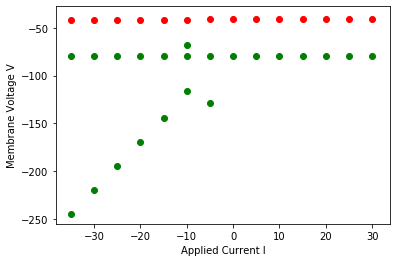

In [67]:
def func(z):
    V = z[0]
    n = z[1]
    F = empty((2))
    F[0] = (i - g_L*(V - E_L2) - g_Na*1/(1 + exp((V_half_m_inf - V)/k_m))*(V - E_Na))/(g_K*(V - E_K)) - n
    F[1] = 1/(1 + exp((V_half_n_inf2 - V)/k_n)) - n
    return F

I = [-35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30]
for i in I:
    print("I =", i)
    d = {}
    for init in [-80, -70, -60, -50, -40, -30, -20]:
        criticalpoints = fsolve(func, [init, 0.5])
        x = int(np.round(criticalpoints[0]))
        y = np.round(criticalpoints[1], 1)
        if (x, y) not in d and abs(x) < 1000:
            d[(x, y)] = 0
    
    print("Number of Critical Points =", len(d))
    cnt = 1
    for item in d.keys():
        print("Critical Point", cnt, "=", item)
        cnt += 1
    print()
    for tup in d:
        xx = tup[0]
        yy = tup[1]
        stability = eigenvalues(xx, yy)
        if stability == 0:
            c = 'r'
        elif stability == 1:
            c = 'g'
        plt.scatter(i, xx, c=c)
    
    print("\n\n")

plt.xlabel("Applied Current I")
plt.ylabel("Membrane Voltage V")
plt.show()

# I_Na,t model

## Jacobian

In [36]:
C = 1

g_L1 = 0.3
g_Na1 = 10
g_L2 = 1
g_Na2 = 15
g_K = 36

E_L1 = 10.6
E_Na1 = 120
E_L2 = -70
E_Na2 = 60
E_K = -12

tau = 5

V_half_m_inf = -40
k_m = 15
V_half_h_inf1 = -42
V_half_h_inf2 = -62
k_h = -7

I = -2.69

m_inf = 1/(1 + exp((V_half_m_inf - V)/k_m))
h_inf = 1/(1 + exp((V_half_h_inf1 - V)/k_h))
Vdot = (I - g_L1*(V - E_L1) - g_Na1*m_inf*m_inf*m_inf*h*(V - E_Na1))/C
hdot = (h_inf - h)/tau

In [37]:
a = diff(Vdot, V)
aa = lambdify((V,h), a)
b = diff(Vdot, h)
bb = lambdify((V,h), b)
c = diff(hdot, V)
cc = lambdify((V,h), c)
d = diff(hdot, h)
dd = lambdify((V,h), d)

In [38]:
jacobian = Matrix([[a, b], [c, d]])

In [39]:
jacobian

Matrix([
[-2*h*(V - 120)*exp(-V/15 - 8/3)/(exp(-V/15 - 8/3) + 1)**4 - 10*h/(exp(-V/15 - 8/3) + 1)**3 - 0.3, -10*(V - 120)/(exp(-V/15 - 8/3) + 1)**3],
[                                                        -exp(V/7 + 6)/(35*(exp(V/7 + 6) + 1)**2),                                    -1/5]])

In [40]:
#jacobian.eigenvals()

## Bifurcation Diagram 

I = -3.5
Number of Critical Points = 3
Critical Point 1 = (-71, 1.0)
Critical Point 2 = (-62, 0.9)
Critical Point 3 = (-27, 0.1)

Check the fixed point  -71, 1.0
The first eigenvalue is -0.19672426297948503
The second eigenvalue is 0.16375622822380836
The fixed point (-71, 1.0) is a saddle. It is unstable
Check the fixed point  -62, 0.9
The first eigenvalue is -0.18888616617112808
The second eigenvalue is 1.3828784146431286
The fixed point (-62, 0.9) is a saddle. It is unstable
Check the fixed point  -27, 0.1
The first eigenvalue is 0.5493603218997188
The second eigenvalue is 1.6381738661070973
The fixed point (-27, 0.1) is a source. It is unstable



I = -3.2
Number of Critical Points = 3
Critical Point 1 = (-70, 1.0)
Critical Point 2 = (-62, 0.9)
Critical Point 3 = (-27, 0.1)

Check the fixed point  -70, 1.0
The first eigenvalue is -0.19636138253507432
The second eigenvalue is 0.2463413332471889
The fixed point (-70, 1.0) is a saddle. It is unstable
Check the fixed point  -62, 0.9
Th

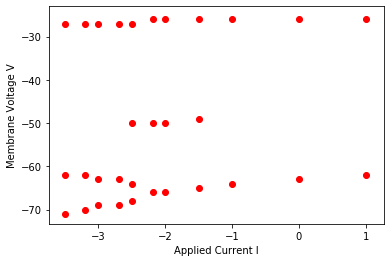

In [41]:
def func(z):
    V = z[0]
    h = z[1]
    F = empty((2))
    
    F[0] = (i - g_L2*(V - E_L2))/(g_Na2 * (1/(1 + exp((V_half_m_inf - V)/k_m)))**3 * (V - E_Na2)) - h
    F[1] = 1/(1 + exp((V_half_h_inf1 - V)/k_h)) - h
    

    return F

I = [-3.5, -3.2, -3, -2.69, -2.5, -2.19, -2, -1.5, -1, 0, 1]
for i in I:
    print("I =", i)
    d = {}
    for init in [-80, -70, -60, -50, -40, -30, -20]:
        criticalpoints = fsolve(func, [init, 0.5])
        x = int(np.round(criticalpoints[0]))
        y = np.round(criticalpoints[1], 1)
        if (x, y) not in d:
            d[(x, y)] = 0
    
    print("Number of Critical Points =", len(d))
    cnt = 1
    for item in d.keys():
        print("Critical Point", cnt, "=", item)
        cnt += 1
    print()
    for tup in d:
        xx = tup[0]
        yy = tup[1]
        stability = eigenvalues(xx, yy)
        if stability == 0:
            c = 'r'
        elif stability == 1:
            c = 'g'
        plt.scatter(i, xx, c=c)
    
    print("\n\n")
    
plt.xlabel("Applied Current I")
plt.ylabel("Membrane Voltage V")
plt.show()

I = 0
Number of Critical Points = 3
Critical Point 1 = (-70, 0.7)
Critical Point 2 = (-31, 0.1)
Critical Point 3 = (-32, 0.1)

Check the fixed point  -70, 0.7
The first eigenvalue is -1.4469833322271226
The second eigenvalue is -0.057510868071107724
The fixed point (-70, 0.7) is a sink. It is stable
Check the fixed point (-31, 0.1)
The real component of the first eigenvalue is -0.097473103435163
The real component of the second eigenvalue is -0.097473103435163
The fixed point (-31, 0.1) is a sink. It is stable
Check the fixed point (-32, 0.1)
The real component of the first eigenvalue is -0.09557090498457865
The real component of the second eigenvalue is -0.09557090498457865
The fixed point (-32, 0.1) is a sink. It is stable



I = 1
Number of Critical Points = 2
Critical Point 1 = (-69, 0.7)
Critical Point 2 = (-32, 0.1)

Check the fixed point  -69, 0.7
The first eigenvalue is -1.2594240878017975
The second eigenvalue is -0.05996022102963827
The fixed point (-69, 0.7) is a sink. It is

Number of Critical Points = 1
Critical Point 1 = (-32, 0.0)

Check the fixed point (-32, 0.0)
The real component of the first eigenvalue is -0.125
The real component of the second eigenvalue is -0.125
The fixed point (-32, 0.0) is a sink. It is stable



I = 17
Number of Critical Points = 1
Critical Point 1 = (-32, 0.0)

Check the fixed point (-32, 0.0)
The real component of the first eigenvalue is -0.125
The real component of the second eigenvalue is -0.125
The fixed point (-32, 0.0) is a sink. It is stable



I = 18
Number of Critical Points = 1
Critical Point 1 = (-31, 0.0)

Check the fixed point (-31, 0.0)
The real component of the first eigenvalue is -0.125
The real component of the second eigenvalue is -0.125
The fixed point (-31, 0.0) is a sink. It is stable



I = 19
Number of Critical Points = 1
Critical Point 1 = (-30, 0.0)

Check the fixed point  -30, 0.0
The first eigenvalue is -0.15081551791735506
The second eigenvalue is -0.09918448208264494
The fixed point (-30, 0.0) is 

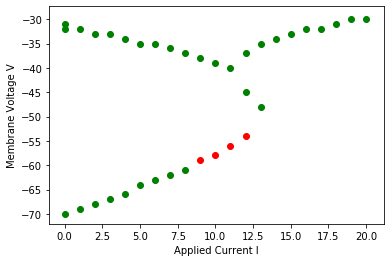

In [58]:
def func(z):
    V = z[0]
    h = z[1]
    F = empty((2))
    
    F[0] = (i - g_L2*(V - E_L2))/(g_Na2 * (1/(1 + exp((V_half_m_inf - V)/k_m)))**3 * (V - E_Na2)) - h
    F[1] = 1/(1 + exp((V_half_h_inf2 - V)/k_h)) - h    

    return F

I = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
for i in I:
    print("I =", i)
    d = {}
    for init in [-80, -70, -60, -50, -40, -30, -20]:
        criticalpoints = fsolve(func, [init, 0.5])
        x = int(np.round(criticalpoints[0]))
        y = np.round(criticalpoints[1], 1)
        if (x, y) not in d:
            d[(x, y)] = 0
    
    print("Number of Critical Points =", len(d))
    cnt = 1
    for item in d.keys():
        print("Critical Point", cnt, "=", item)
        cnt += 1
    print()
    for tup in d:
        xx = tup[0]
        yy = tup[1]
        stability = eigenvalues(xx, yy)
        if stability == 0:
            c = 'r'
        elif stability == 1:
            c = 'g'
        plt.scatter(i, xx, c=c)
    
    print("\n\n")
    
plt.xlabel("Applied Current I")
plt.ylabel("Membrane Voltage V")
plt.show()

# I_A model

## Jacobian

In [42]:
C = 1

g_A = 5
g_L = 0.2

E_K = -80
E_L = -60

tau = 20

V_half_h_inf = -66
k_h = -10
V_half_m_inf1 = -45
V_half_m_inf2 = -35
k_m = 10

I = 8

Vdot = (I - g_L * (V - E_L) - g_A * m * (1/(1 + exp((V_half_h_inf - V)/k_h))) * (V - E_K))/C
mdot = ((1/(1 + exp((V_half_m_inf1 - V)/k_m))) - m)/tau

In [43]:
a = diff(Vdot, V)
aa = lambdify((V,m), a)
b = diff(Vdot, m)
bb = lambdify((V,m), b)
c = diff(mdot, V)
cc = lambdify((V,m), c)
d = diff(mdot, m)
dd = lambdify((V,m), d)

In [44]:
jacobian = Matrix([[a, b], [c, d]])

In [45]:
jacobian

Matrix([
[m*(V + 80)*exp(V/10 + 33/5)/(2*(exp(V/10 + 33/5) + 1)**2) - 5*m/(exp(V/10 + 33/5) + 1) - 0.2, -5*(V + 80)/(exp(V/10 + 33/5) + 1)],
[                                            exp(-V/10 - 9/2)/(200*(exp(-V/10 - 9/2) + 1)**2),                              -1/20]])

In [46]:
#jacobian.eigenvals()

## Bifurcation Diagram

WARNING    /Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
 [py.warnings]
WARNING    /Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
 [py.warnings]
WARNING    /Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
 [py.warnings]


I = -3.15
Number of Critical Points = 2
Critical Point 1 = (-80, 0.5)
Critical Point 2 = (-77, 0.0)

Check the fixed point  -80, 0.5
The first eigenvalue is -2.205459721396455
The second eigenvalue is -0.050000000000000044
The fixed point (-80, 0.5) is a sink. It is stable
Check the fixed point  -77, 0.0
The first eigenvalue is -0.1842239721631445
The second eigenvalue is -0.0657760278368555
The fixed point (-77, 0.0) is a sink. It is stable



I = -3.1
Number of Critical Points = 2
Critical Point 1 = (-80, 0.5)
Critical Point 2 = (-77, 0.0)

Check the fixed point  -80, 0.5
The first eigenvalue is -2.205459721396455
The second eigenvalue is -0.050000000000000044
The fixed point (-80, 0.5) is a sink. It is stable
Check the fixed point  -77, 0.0
The first eigenvalue is -0.1842239721631445
The second eigenvalue is -0.0657760278368555
The fixed point (-77, 0.0) is a sink. It is stable



I = -3
Number of Critical Points = 2
Critical Point 1 = (-80, 0.5)
Critical Point 2 = (-76, 0.0)

Check

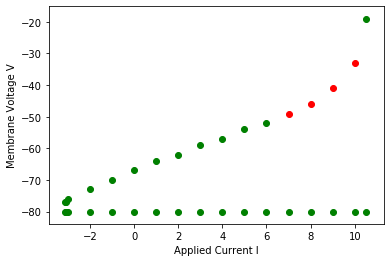

In [47]:
import cmath

def func(z):
    V = z[0]
    m = z[1]
    F = empty((2))
    
    F[0] = (i - g_L*(V - E_L))/(g_A * (1/(1 + cmath.exp((V_half_h_inf - V)/k_h))) * (V - E_K)) - m
    F[1] = 1/(1 + exp((V_half_m_inf2 - V)/k_m)) - m

    return F

I = [-3.15, -3.1, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6,7, 8, 9, 10, 10.5]
for i in I:
    print("I =", i)
    d = {}
    for init in [-80, -70, -60, -50, -40, -30, -20]:
        criticalpoints = fsolve(func, [init, 0.5])
        x = int(np.round(criticalpoints[0]))
        y = np.round(criticalpoints[1], 1)
        if (x, y) not in d:
            d[(x, y)] = 0
    
    print("Number of Critical Points =", len(d))
    cnt = 1
    for item in d.keys():
        print("Critical Point", cnt, "=", item)
        cnt += 1
    print()
    for tup in d:
        xx = tup[0]
        yy = tup[1]
        stability = eigenvalues(xx, yy)
        if stability == 0:
            c = 'r'
        elif stability == 1:
            c = 'g'
        plt.scatter(i, xx, c=c)    
    print("\n\n")
    
plt.xlabel("Applied Current I")
plt.ylabel("Membrane Voltage V")
plt.show()

WARNING    /Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
 [py.warnings]
WARNING    /Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
 [py.warnings]
WARNING    /Users/mac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  
 [py.warnings]


I = -3
Number of Critical Points = 2
Critical Point 1 = (-80, 0.5)
Critical Point 2 = (-76, 0.0)

Check the fixed point  -80, 0.5
The first eigenvalue is -2.205459721396455
The second eigenvalue is -0.050000000000000044
The fixed point (-80, 0.5) is a sink. It is stable
Check the fixed point  -76, 0.0
The first eigenvalue is -0.1760828253185826
The second eigenvalue is -0.07391717468141741
The fixed point (-76, 0.0) is a sink. It is stable



I = -2
Number of Critical Points = 2
Critical Point 1 = (-80, 0.5)
Critical Point 2 = (-73, 0.0)

Check the fixed point  -80, 0.5
The first eigenvalue is -2.205459721396455
The second eigenvalue is -0.050000000000000044
The fixed point (-80, 0.5) is a sink. It is stable
Check the fixed point (-73, 0.0)
The real component of the first eigenvalue is -0.125
The real component of the second eigenvalue is -0.125
The fixed point (-73, 0.0) is a sink. It is stable



I = -1
Number of Critical Points = 2
Critical Point 1 = (-80, 0.5)
Critical Point 2 = (-

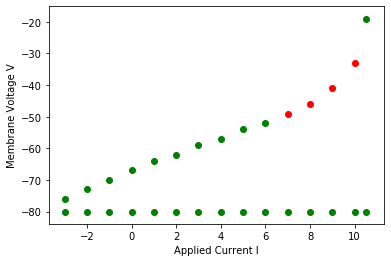

In [52]:
def func(z):
    V = z[0]
    m = z[1]
    F = empty((2))
    
    F[0] = (i - g_L*(V - E_L))/(g_A * (1/(1 + cmath.exp((V_half_h_inf - V)/k_h))) * (V - E_K)) - m
    F[1] = 1/(1 + exp((V_half_m_inf2 - V)/k_m)) - m
    
    return F

I = [-3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10.5]
for i in I:
    print("I =", i)
    d = {}
    for init in [-80, -70, -60, -50, -40, -30, -20]:
        criticalpoints = fsolve(func, [init, 0.5])
        x = int(np.round(criticalpoints[0]))
        y = np.round(criticalpoints[1], 1)
        if (x, y) not in d:
            d[(x, y)] = 0
    
    print("Number of Critical Points =", len(d))
    cnt = 1
    for item in d.keys():
        print("Critical Point", cnt, "=", item)
        cnt += 1
    print()
    for tup in d:
        xx = tup[0]
        yy = tup[1]
        stability = eigenvalues(xx, yy)
        if stability == 0:
            c = 'r'
        elif stability == 1:
            c = 'g'
        plt.scatter(i, xx, c=c)    
    print("\n\n")
    
plt.xlabel("Applied Current I")
plt.ylabel("Membrane Voltage V")
plt.show()